In [59]:
# Let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'D:\Data Analytics\Portfolio Projects\Python\movies.csv')

In [42]:
# let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [62]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [61]:
# Let,s replace missing values with mean for numerical data instead of dropping it

df.fillna(df.mean(numeric_only=True), inplace=True)


In [63]:
# Let's drop NA in the column rating
df.dropna(subset=['rating'])
# df = df.dropna()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,7.850054e+07,NaN,90.000000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,3.558988e+07,7.850054e+07,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,7.850054e+07,Embi Productions,107.261613
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,1.500000e+04,7.850054e+07,NaN,120.000000


In [86]:
# Data Types for our columns

print(df.dtypes)

name           object
rating         object
genre          object
year            int64
released       object
score           int64
votes           int64
director       object
writer         object
star           object
country        object
budget          int64
gross           int64
company        object
runtime         int64
yearcorrect    object
dtype: object


In [65]:
# Change data type of the columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['score'] = df['score'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


In [58]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120,2020


In [68]:
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)


df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120,2020


In [79]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [108]:
# Display 70 rows

pd.set_option ('display.max_rows', 70)

In [80]:
# Drop duplicates

df.drop_duplicates()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [81]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


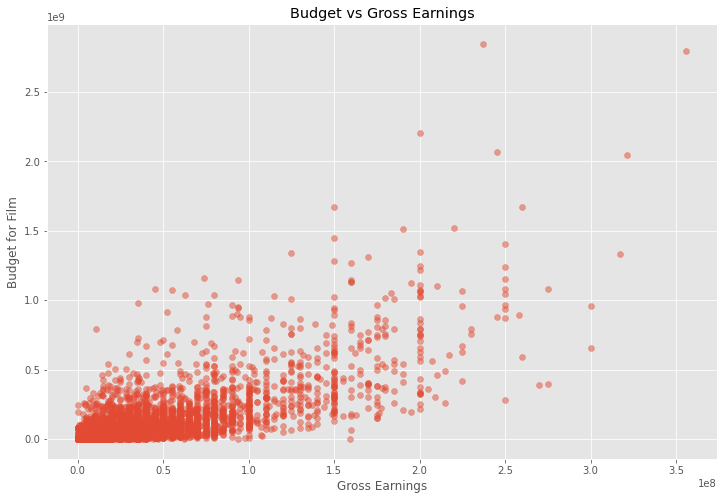

In [89]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [78]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [84]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<AxesSubplot:xlabel='gross', ylabel='budget'>

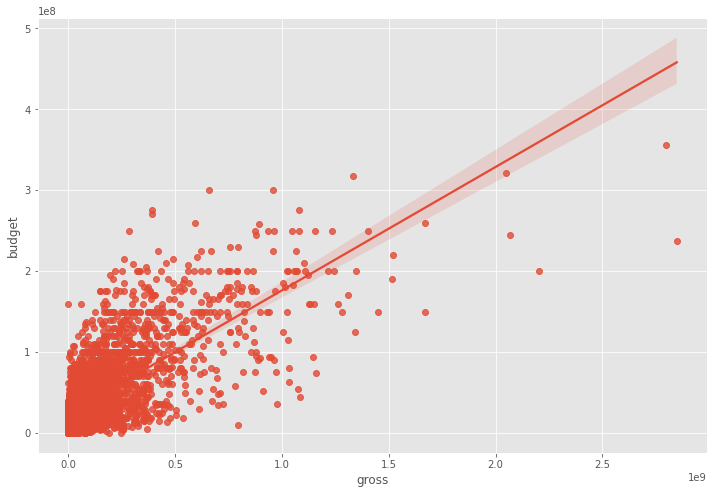

In [91]:
# Plot budget vs gross using seaborn
sns.regplot(x="gross", y="budget", data=df)


In [ ]:
# Let's look for correlations
# Correlation Matrix between all numeric columns

In [95]:
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.096100,0.222810,0.265578,0.252042,0.120758
score,0.096100,1.000000,0.393355,0.059254,0.174156,0.382873
votes,0.222810,0.393355,1.000000,0.421007,0.628713,0.309168
budget,0.265578,0.059254,0.421007,1.000000,0.711270,0.265289
gross,0.252042,0.174156,0.628713,0.711270,1.000000,0.241336
runtime,0.120758,0.382873,0.309168,0.265289,0.241336,1.000000


In [96]:
df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.073341,0.331581,0.144258,0.182415,0.097256
score,0.073341,1.000000,0.318359,0.003550,0.087476,0.299221
votes,0.331581,0.318359,1.000000,0.161337,0.508040,0.198200
budget,0.144258,0.003550,0.161337,1.000000,0.258476,0.161710
gross,0.182415,0.087476,0.508040,0.258476,1.000000,0.156124
runtime,0.097256,0.299221,0.198200,0.161710,0.156124,1.000000


In [97]:
df.corr(method ='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.096818,0.470008,0.202558,0.267101,0.143088
score,0.096818,1.000000,0.412190,0.004477,0.115796,0.383250
votes,0.470008,0.412190,1.000000,0.234535,0.688687,0.290103
budget,0.202558,0.004477,0.234535,1.000000,0.361668,0.227857
gross,0.267101,0.115796,0.688687,0.361668,1.000000,0.227970
runtime,0.143088,0.383250,0.290103,0.227857,0.227970,1.000000


In [ ]:
# High correlation between budget and gross

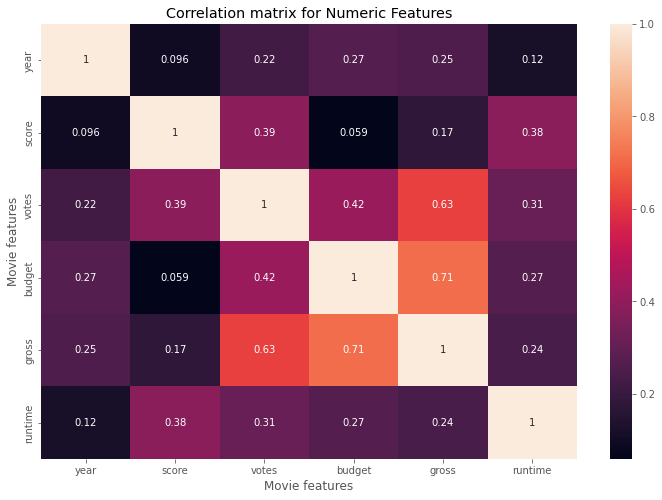

In [98]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [99]:
# Looks at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [100]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,2019,183,8,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,1997,704,7,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,2015,698,7,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,2018,192,8,897000,162,743,2241,55,321000000,2048359754,1606,149,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6,5200,730,1123,2319,54,35589876,1400,477,103,21
7625,6720,-1,4,2019,1149,5,320,2546,2565,1915,55,35589876,790,2308,104,39
7580,4664,3,5,2019,1835,5,735,1445,2203,2278,55,35589876,682,1992,93,40
2417,3406,-1,6,1993,85,7,5100,33,1718,2563,27,11900000,596,796,134,13


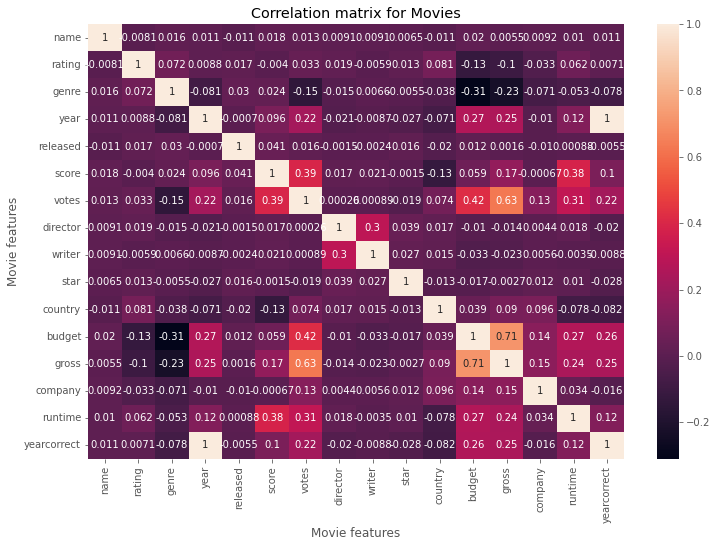

In [101]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [102]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017825,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010386,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.003993,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062057,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023595,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052701,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.096100,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120758,0.997295
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.041287,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000877,-0.005455
score,0.017825,-0.003993,0.023595,0.096100,0.041287,1.000000,0.393355,0.016695,0.020540,-0.001492,-0.125567,0.059254,0.174156,-0.000669,0.382873,0.103388
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.393355,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,0.133129,0.309168,0.218235
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.016695,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017623,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.020540,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003512,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001492,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010169,-0.027576


In [110]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.259433
             gross          0.245356
             company       -0.016109
             runtime        0.120540
             yearcorrect    1.000000
Length: 256, dtype: float64

In [111]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

budget       genre         -0.310566
genre        budget        -0.310566
             gross         -0.230267
gross        genre         -0.230267
genre        votes         -0.145276
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [112]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs

gross        votes          0.628713
votes        gross          0.628713
budget       gross          0.711270
gross        budget         0.711270
year         yearcorrect    0.997295
yearcorrect  year           0.997295
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings